# Intro to Machine Learning 
**Machine learning** (ML) is a sub-field of artificial intelligence in which machine algorithms attempt to solve a specific problem by recognizing sometimes hidden relationships between input data and output data. 

Rather than hard-coding rules for the computer to follow (e.g. an endless nest of if-then statements to lead to a certain result), the machine is allowed to develop its own rules based on the limited information it is fed. In fact, ML models have been more efficient at humans in 2D image recognition, and have been for the last decade. This makes ML a powerful classification tool!

**Caveat:** ML algorithms are only as good as their training and may exacerbate inherent biases within a dataset. It's very important to understand the limitations of your data, or else you may misinterpret the results of your ML algorithm!

*Hypothetical example of biases in ML: \
A new telescope is built to probe a type of astronomical object that we know very little about, which we'll call "Type I Anomalies". To isolate Type I Anomalies in the data from other types of objects that may be observed by this telescope (e.g. galaxies, stars, planets), researchers train an ML model to classify all objects based on certain observational properties. This model is trained on currently-available datasets of galaxies, stars, and planets taken by older telescopes. However, because the training set does not include much information about Type I Anomalies, the ML model -- which only knows what galaxies, stars, and planets look like -- is very likely to misclassify Type I Anomalies as galaxies, stars, or planets!*

## Important Terminology
- **Features**: Data; the actual observable properties/attributes of whatever you're feeding into the model, which will be used to train the model. Simple ML models generally work by determining which features weigh more heavily in determining an object's classification.
- **Feature Engineering**: The process of building new features by combining pre-existing features. \
*Example: if you observe the brightness/magnitude of a star in two filters (e.g. F555W and F814W in HST, corresponding to central wavelengths of 555 nm and 814 nm), then the color of the star (calculated as the magnitude in F555W - the magnidue in F814W) is an engineered feature.*
- **Labels**: The classification of each object, typically what ML models are used to predict. For some ML algorithms, labels must be given as a numerical value, but there are ways around this. 
- **Supervised Machine Learning**: Models in which the training set is fed into the ML algorithm with pre-defined labels. The ML model learns to associate certain labels with certain sets of features and (ideally) is able to predict the label that best matches some given set of features. 
- **Unsupervised Machine Learning**: Models that are given only a set of features with no labels and are allowed to determine their own grouping methods. These models may be useful for identifying underlying correlations in the data that aren't obvious to the human eye. 
- **Classifier**: Algorithm built to divide data into discrete classifications, given an input of features. 
    - Random Forest Classifier
    - Convolutional Neural Network (CNN)
    - *k*-nearest neighbors (KNN)
    - *k*-means clustering
    - etc...
- **Regressor**: Algorithm built to extrapolate continuous values based on inherent correlations in the data, modeling an output value based on input features.
    - Linear regression
    - Stochastic gradient descent
    - etc...

# Basic ML Classification with `scikit-learn`
`scikit-learn`, or `sklearn`, is a very simplified, beginner-friendly `python` ML package that comes pre-loaded with datasets one can experiment with. Here we will use the famous iris flower dataset (which you may recognize if you've ever read a paper on ML) to build a complex classifier. 

The general process of building, testing, and using a classifier is: 
1. Import your preferred classification algorithm from some `python` ML package into your code.

2. Build or import your dataset. In general, `python` ML algorithms require your features to be stored in a 2D array (which we will call `X`), in which each row represents an individual source/object, and each column represents the value of a particular feature. If building a supervised ML model, then you should also build a 1D label array (`y`), for which each item in the array is the label corresponding to each row in `X`. Example:
    ```
    X = [[Source1_Feature1, Source1_Feature2, Source1_Feature3...],
         [Source2_Feature1, Source2_Feature2, Source2_Feature3...], 
         [Source3_Feature1, Source3_Feature2, Source3_Feature3...]]
    y = [Source1_label, Source2_label, Source3_label]
    ```
    
3. Build a training and test set from the data. A good rule of thumb is for at least 70% of the data to be used for training, and 30% of the data should be used for testing the resulting model. The data should be divided randomly to avoid unintended biases!

4. Train the model with the training set. In `sklearn`, this is done by using the `fit()` function within the chosen classifier. For example: 
    ```
    RandomForestClassifier().fit(X_training)
    ```
    will build an unsupervised random forest classifier, or for a supervised version: 
    ```
    RandomForestClassifier().fit(X_training, y_training)
    ```
    
5. Test the model by asking it to predict the labels of the test set. In `sklearn`, this is done using the `predict()` function: 
   ```
   RandomForestClassifier().predict(X_test)
   ```
   If the model works well, then the function should return a list of labels that match `y_test`. You can run statistics on the numbers of labels the model got wrong to get an idea of the accuracy of the ML model.

6. If the model performs well, you can run it on new data (for which the labels are unknown) to get the most likely labels! 

The code in this section is adapted from the [LSSTC Data Science Fellowship Program GitHub (Session 14)](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions).

In [1]:
# Importing/installing necessary packages
# All functions in Python must be imported before they can be used
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

## Getting to know the iris data

Before we attempt ML, it's important to inspect the data we'll be working with. One should always make themselves familiar with any data fed into an ML model, so that one can understand the limitations and biases of the model.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png" width="575"/>

<img src="https://content.codecademy.com/programs/machine-learning/k-means/iris.svg" width="600"/>

Image credit: [Mr S, Kaggle](https://www.kaggle.com/code/sunaysawant/iris-eda-pca)

In [2]:
from sklearn import datasets # importing pre-built datasets from sklearn
iris = datasets.load_iris()

# Printing the information that we can pull from the dataset, 
# which are called by using their 'keys'
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Using the DESC key to print information about the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# Printing the type of irises in the dataset (labels)
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# Printing the properties of the irises (features)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Example snippet of the feature array, which we called X above
print(iris.data[0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


<IPython.core.display.Javascript object>


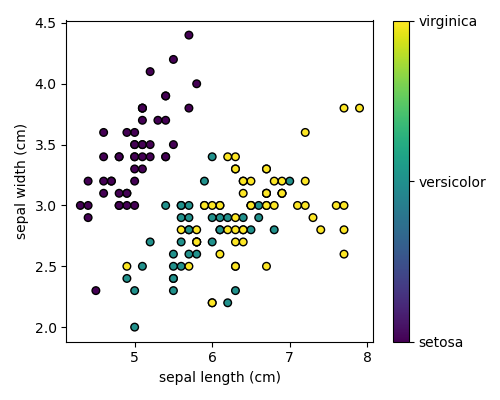

In [7]:
# Plotting the distribution of these features
fig, ax = plt.subplots(figsize=(5,4))
sp = ax.scatter(iris.data[:,0], iris.data[:,1], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
cb = fig.colorbar(sp)
cb.set_ticks([0,1,2], labels=iris.target_names)
fig.tight_layout()

# QUESTION: How does the plot change based on the features plotted? 
#           Do you notice groupings based on the features observed? 

## Unsupervised learning w/ the iris dataset
The examples here use clustering algorithms to make a ML model that can predict the most likely label (e.g. biological class) of each source (flower) using the input features (sepal and petal widths and lengths).

One of the simplest clustering methods is the *K*-means method. Generally, the user specifies how many clusters to divide the data into (K) and an initial guess for each cluster center. The algorithm then iteratively divides the data into clusters based on the distance of the data from the cluster centers, redefines the cluster centers based on the mean position of all sources within the cluster, and repeats until it finds an optimal clustering solution. 

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*oj1MBxiPfnyeQC3HnCcJiw.gif" width="600"/>

Image credit: [Alan Jeffares, Medium](https://medium.com/data-science/k-means-a-complete-introduction-1702af9cd8c)

Since this is an unsupervised learning, the data 'looks' to the algorithm like this: 

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(9,2.5))
ax[0].scatter(iris.data[:,0], iris.data[:,1], color="k")
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].scatter(iris.data[:,0], iris.data[:,2], color="k")
ax[1].set_xlabel(iris.feature_names[0])
ax[1].set_ylabel(iris.feature_names[2])
ax[2].scatter(iris.data[:,1], iris.data[:,3], color="k")
ax[2].set_xlabel(iris.feature_names[1])
ax[2].set_ylabel(iris.feature_names[3])
ax[3].scatter(iris.data[:,2], iris.data[:,3], color="k")
ax[3].set_xlabel(iris.feature_names[2])
ax[3].set_ylabel(iris.feature_names[3])
fig.tight_layout()
plt.show()

We already know there are 3 different classes of flowers in this dataset, so we will set K = 3. We can request that the code makes its own initial guess at the cluster centers using `init='k-means++'` or `init='random'`:

In [8]:
# Importing the K-means function 
from sklearn.cluster import KMeans

# Building the model
# For a truly random model, remove the random_state parameter
km_model = KMeans(n_clusters=3, init='random', max_iter=100, random_state=1)

# Fitting the model to the data
km_model.fit(iris.data)

KMeans(init='random', max_iter=100, n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>


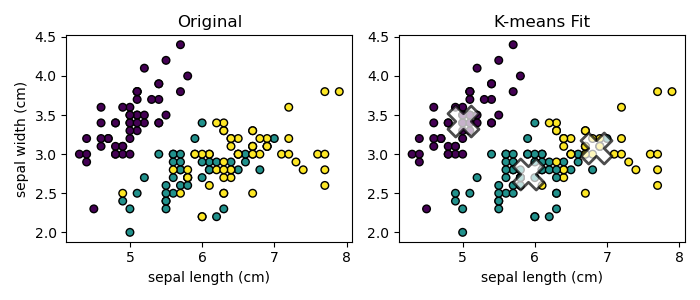

<IPython.core.display.Javascript object>


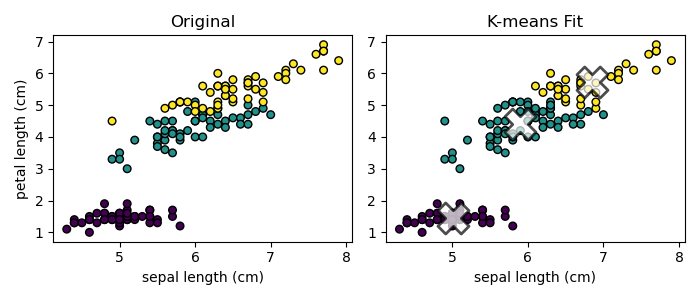

<IPython.core.display.Javascript object>


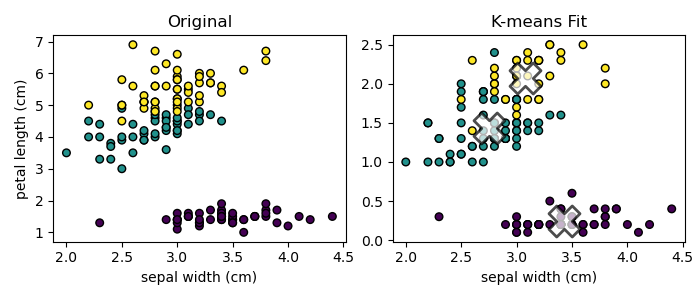

<IPython.core.display.Javascript object>


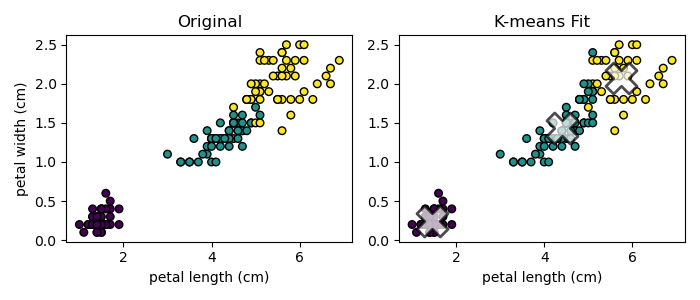

In [9]:
# Plotting the true results
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].scatter(iris.data[:,0], iris.data[:,1], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[0].set_title("Original")

# Plotting the model results
ax[1].scatter(iris.data[:,0], iris.data[:,1], 
              c = km_model.labels_, s = 30, cmap="viridis", edgecolor='k')
ax[1].scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], # cluster centers
           marker='X', s=500, facecolor="white", edgecolor="black", alpha=0.7, zorder=999, linewidth=2)
ax[1].set_title("K-means Fit")
ax[1].set_xlabel(iris.feature_names[0])
fig.tight_layout()
plt.show()

# Plotting the true results
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].scatter(iris.data[:,0], iris.data[:,2], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[2])
ax[0].set_title("Original")

# Plotting the model results
ax[1].scatter(iris.data[:,0], iris.data[:,2], 
              c = km_model.labels_, s = 30, cmap="viridis", edgecolor='k')
ax[1].scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,2], 
           marker='X', s=500, facecolor="white", edgecolor="black", alpha=0.7, zorder=999, linewidth=2)
ax[1].set_title("K-means Fit")
ax[1].set_xlabel(iris.feature_names[0])
fig.tight_layout()
plt.show()

# Plotting the true results
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].scatter(iris.data[:,1], iris.data[:,2], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(iris.feature_names[1])
ax[0].set_ylabel(iris.feature_names[2])
ax[0].set_title("Original")

# Plotting the model results
ax[1].scatter(iris.data[:,1], iris.data[:,3], 
              c = km_model.labels_, s = 30, cmap="viridis", edgecolor='k')
ax[1].scatter(km_model.cluster_centers_[:,1], km_model.cluster_centers_[:,3], 
           marker='X', s=500, facecolor="white", edgecolor="black", alpha=0.7, zorder=999, linewidth=2)
ax[1].set_title("K-means Fit")
ax[1].set_xlabel(iris.feature_names[1])
fig.tight_layout()
plt.show()

# Plotting the true results
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].scatter(iris.data[:,2], iris.data[:,3], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(iris.feature_names[2])
ax[0].set_ylabel(iris.feature_names[3])
ax[0].set_title("Original")

# Plotting the model results
ax[1].scatter(iris.data[:,2], iris.data[:,3], 
              c = km_model.labels_, s = 30, cmap="viridis", edgecolor='k')
ax[1].scatter(km_model.cluster_centers_[:,2], km_model.cluster_centers_[:,3], 
           marker='X', s=500, facecolor="white", edgecolor="black", alpha=0.7, zorder=999, linewidth=2)
ax[1].set_title("K-means Fit")
ax[1].set_xlabel(iris.feature_names[2])
fig.tight_layout()
plt.show()

It's important to evaluate your model before applying it to actual data. We can quantify the accuracy of this model using `accuracy_score()`:

In [10]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(km_model.labels_, iris.target) # accuracy as a fraction 
print(f'The accuracy of this model is {round(acc*100, 2)}%')

The accuracy of this model is 89.33%


The weaknesses of your model can also be visualized using a confusion matrix, which tells you the actual vs. modeled labels. In a confusion matrix, you want high values along the diagonal and near zero within the corners. 

Array form:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Graphical form:


<IPython.core.display.Javascript object>


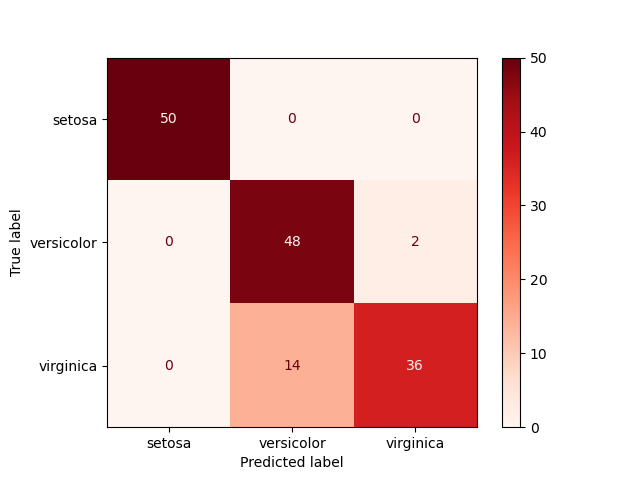

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(iris.target, km_model.labels_)
print("Array form:\n",cm)

print("\nGraphical form:")
ConfusionMatrixDisplay.from_predictions(iris.target, km_model.labels_,
                              display_labels=iris.target_names, cmap="Reds")
plt.show()

***What if we don't know the number of clusters we want?***

Alternative to *K*-means clustering, you can try [Density-based spatial clustering of applications with noise](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) (DBSCAN) in `sklearn.cluster`. This algorithm searches for clusters using a user-defined search radius and looks for 'cores' with a high density of sources around them. This is usually pretty good at determining a reasonable number of clusters, but does poorly when there are significant outliers in the data. 

## Supervised ML w/ the iris dataset

Ideally with supervised ML (as with all ML), you would want a large dataset to train your model; however, we'll continue working with the iris dataset for demonstrative purposes. 

In this demo, I will show an example of creating training and test sets. We will then simulate a random set of virtual flowers and see how the trained model divides them. 

`sklearn` includes a function for randomly dividing labeled datasets into training and test sets called `sklearn.model_selection.train_test_split`. Here, we will divide them into 70-30% for training set vs. test set.

In [12]:
from sklearn.model_selection import train_test_split

# Recall, X is the feature array (data), and y are the labels (targets)
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.3)

Select your favorite classifier. \
Some common examples are `sklearn.neighbors.KNeighborsClassifier` and `sklearn.ensemble.RandomForestClassifier`. 

Each has its benefit, but I generally prefer a random forest classifier, because it tells you which feature is most important in classifying each source.

<img src="https://images.prismic.io/turing/65980c06531ac2845a27269b_Random_Forest_Algorithm_400798756c.webp?auto=format,compress" width="500"/>

Image credit: [Mohit Chaudhary, Turing](https://www.turing.com/kb/random-forest-algorithm)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Setting up the model
# For a truly random model, remove the random_state parameter
rf_clf = RandomForestClassifier(n_estimators=50, random_state=3)

# Training the model
rf_clf.fit(train_X, train_y)

print("Importance of features in random forest classifier:")
[print(f'{f}: {rf_clf.feature_importances_[i]}') for i,f in enumerate(iris.feature_names)]

Importance of features in random forest classifier:
sepal length (cm): 0.15765510291270446
sepal width (cm): 0.031722688369043225
petal length (cm): 0.34906396258703126
petal width (cm): 0.46155824613122115


[None, None, None, None]

This matches the class correlation from `iris.DESCR` printed before: 

To test the algorithm, we use the `.predict()` function on the test sources:

The accuracy of this model is 95.56%


<IPython.core.display.Javascript object>


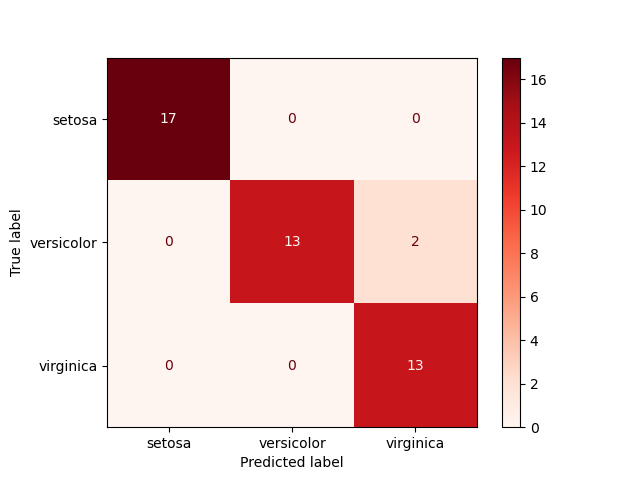

In [14]:
# Testing the model 
pred_y = rf_clf.predict(test_X)

# Evaluating the model
acc = accuracy_score(pred_y, test_y) # accuracy as a fraction 
print(f'The accuracy of this model is {round(acc*100, 2)}%')

ConfusionMatrixDisplay.from_predictions(test_y, pred_y,
                              display_labels=iris.target_names, cmap="Reds")
plt.show()

Next, we will simulate 300 virtual flower observations using the properties of the dataset above and see how the model separates them. This is analogous to using your ML model to evaluate real data for which the labels are unknown, the ultimate purpose of a classifier. 

In [15]:
# randomly generating 100 of each type of flower based (loosely) on the 
# centers of each cluster of features per class found previously and 
# the standard deviations of features in the iris dataset

n_obs = 100

# feature list = virginica values + versicolor values + setosa values
sep_lens = np.concatenate((np.random.normal(7.0, 0.83/2., n_obs), 
                     np.random.normal(6.0, 0.83/2., n_obs), 
                     np.random.normal(5.0, 0.83/2., n_obs)), axis=0)
sep_wids = np.concatenate((np.random.normal(3.0, 0.43/2., n_obs), 
                     np.random.normal(2.8, 0.43/2., n_obs), 
                     np.random.normal(3.5, 0.43/2., n_obs)), axis=0)
pet_lens = np.concatenate((np.random.normal(6.0, 1.76/2., n_obs),
                     np.random.normal(4.5, 1.76/2., n_obs),
                     np.random.normal(1.0, 1.76/2., n_obs)), axis=0)
pet_wids = np.concatenate((np.random.normal(2.0, 0.76/2., n_obs), 
                     np.random.normal(1.5, 0.76/2., n_obs), 
                     np.random.normal(0.3, 0.76/2., n_obs)), axis=0)

# Ensuring there are no negative (non-physical) numbers 
# by truncating all list to 1 or the minimum values (whichever is lower)
sep_lens = np.maximum(1.0, sep_lens)
sep_wids = np.maximum(1.0, sep_wids)
pet_lens = np.maximum(1.0, pet_lens)
pet_wids = np.maximum(0.1, pet_wids)

# Compiling into a feature list
sim_X = np.array([sep_lens, sep_wids, pet_lens, pet_wids]).T
sim_feats = iris.feature_names

SIMULATED FLOWERS


<IPython.core.display.Javascript object>


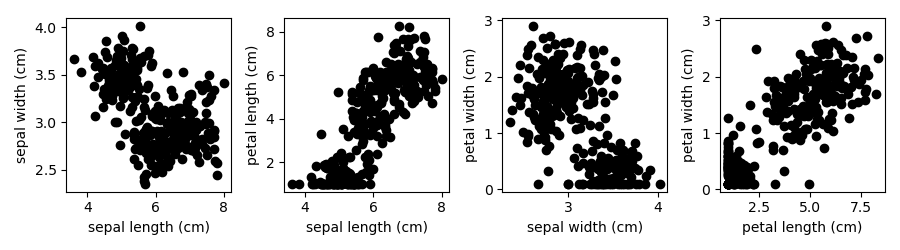

In [16]:
# Plotting 
print("SIMULATED FLOWERS")
fig, ax = plt.subplots(1,4, figsize=(9,2.5))
ax[0].scatter(sim_X[:,0], sim_X[:,1], color="k")
ax[0].set_xlabel(sim_feats[0])
ax[0].set_ylabel(sim_feats[1])
ax[1].scatter(sim_X[:,0], sim_X[:,2], color="k")
ax[1].set_xlabel(sim_feats[0])
ax[1].set_ylabel(sim_feats[2])
ax[2].scatter(sim_X[:,1], sim_X[:,3], color="k")
ax[2].set_xlabel(sim_feats[1])
ax[2].set_ylabel(sim_feats[3])
ax[3].scatter(sim_X[:,2], sim_X[:,3], color="k")
ax[3].set_xlabel(sim_feats[2])
ax[3].set_ylabel(sim_feats[3])
fig.tight_layout()
plt.show()

SIMULATED FLOWERS, SORTED


<IPython.core.display.Javascript object>


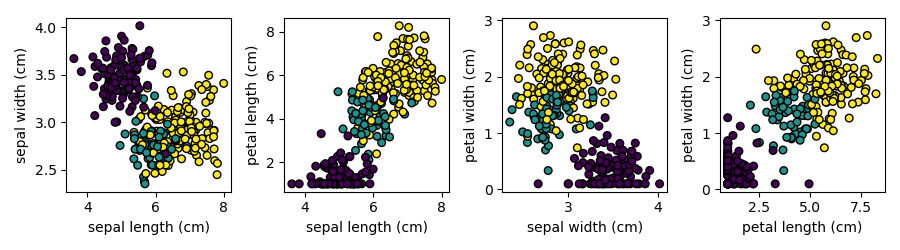

REAL FLOWERS


<IPython.core.display.Javascript object>


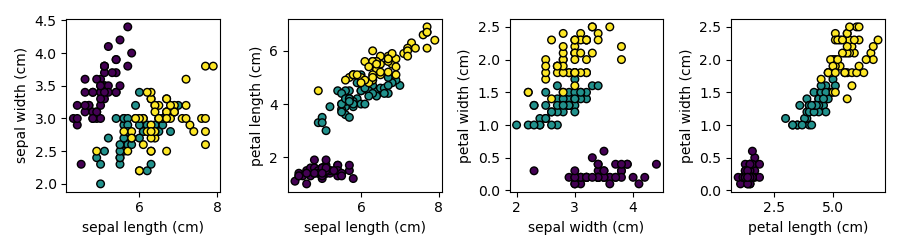

In [17]:
# Modeling best labels
print("SIMULATED FLOWERS, SORTED")
sim_y = rf_clf.predict(sim_X)

fig, ax = plt.subplots(1,4, figsize=(9,2.5))
ax[0].scatter(sim_X[:,0], sim_X[:,1], 
           c = sim_y, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(sim_feats[0])
ax[0].set_ylabel(sim_feats[1])
ax[1].scatter(sim_X[:,0], sim_X[:,2], 
           c = sim_y, s = 30, cmap="viridis", edgecolor='k')
ax[1].set_xlabel(sim_feats[0])
ax[1].set_ylabel(sim_feats[2])
ax[2].scatter(sim_X[:,1], sim_X[:,3], 
           c = sim_y, s = 30, cmap="viridis", edgecolor='k')
ax[2].set_xlabel(sim_feats[1])
ax[2].set_ylabel(sim_feats[3])
ax[3].scatter(sim_X[:,2], sim_X[:,3], 
           c = sim_y, s = 30, cmap="viridis", edgecolor='k')
ax[3].set_xlabel(sim_feats[2])
ax[3].set_ylabel(sim_feats[3])
fig.tight_layout()
plt.show()

# Plotting real flowers, to compare
print("REAL FLOWERS")
fig, ax = plt.subplots(1,4, figsize=(9,2.5))
ax[0].scatter(iris.data[:,0], iris.data[:,1], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].scatter(iris.data[:,0], iris.data[:,2], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[1].set_xlabel(iris.feature_names[0])
ax[1].set_ylabel(iris.feature_names[2])
ax[2].scatter(iris.data[:,1], iris.data[:,3], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[2].set_xlabel(iris.feature_names[1])
ax[2].set_ylabel(iris.feature_names[3])
ax[3].scatter(iris.data[:,2], iris.data[:,3], 
           c = iris.target, s = 30, cmap="viridis", edgecolor='k')
ax[3].set_xlabel(iris.feature_names[2])
ax[3].set_ylabel(iris.feature_names[3])
fig.tight_layout()
plt.show()

## Model optimization
When training the random forest algorithm above, I kept all parameters at their defaults except `n_estimators`. How do we know what settings are best (i.e. take the least amount of computational resources while providing the most accurate fit)?

We can use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to create a grid of models which, when fit to the data, can return the best model settings obtained via cross-validation. This may take a while, depending on the number of data points in your set and settings in your grid.

NOTE: Can also try [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to randomize the grid.

In [18]:
from sklearn.model_selection import GridSearchCV

# Setting up a grid with 4 different settings
grid_results = GridSearchCV(RandomForestClassifier(), 
                            {'n_estimators': [10, 50, 100, 150], # no. of trees in forest
                             'max_features': [1, 2, 3, 4], # no. of features to consider for split
                             'min_samples_leaf': [1,10,15,20]}) # no. of samples required to be at a 'leaf node'
                                                                # (i.e. split point) in the decision tree

grid_results.fit(train_X, train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150]})

In [19]:
print('The best model has {}'.format(grid_results.best_params_))

print("\nImportance of features in random forest classifier:")
[print(f'{f}: {rf_clf.feature_importances_[i]}') for i,f in enumerate(iris.feature_names)]

The best model has {'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 150}

Importance of features in random forest classifier:
sepal length (cm): 0.15765510291270446
sepal width (cm): 0.031722688369043225
petal length (cm): 0.34906396258703126
petal width (cm): 0.46155824613122115


[None, None, None, None]

## Linear Regression with `sklearn`
Suppose you don't want to predict classification labels, but want to use ML to fit a model to some data. In this case, you do not want to use a classifier algorithm. Fortunately `sklearn` has non-classifier models as well!

In this example, we will simulate some data drawn from a linear distribution (y = mx + b) that has some Gaussian noise. We will run the data through a linear regression model to see if we can use ML to determine the underlying distribution.

In [20]:
# Starting with only 10 observations
n_obs = 10

np.random.seed(50) # comment line to ensure truly random run!

# Simulating n_obs random x values between 0 and 100
x_obs = np.random.uniform(0,100,n_obs)

# Randomly generating the slope and intersect of the linear distribution
m = np.random.uniform(0,10,1)
b = np.random.uniform(0,10,1)

# The true distribution is y = mx + b. 
# The observed distribution has some Gaussian noise (randomly simulated below)
y_true = m*x_obs + b

noise = np.random.normal(0,50,n_obs) # simulating random Gaussian noise with sigma=50
y_obs = y_true + noise

<IPython.core.display.Javascript object>


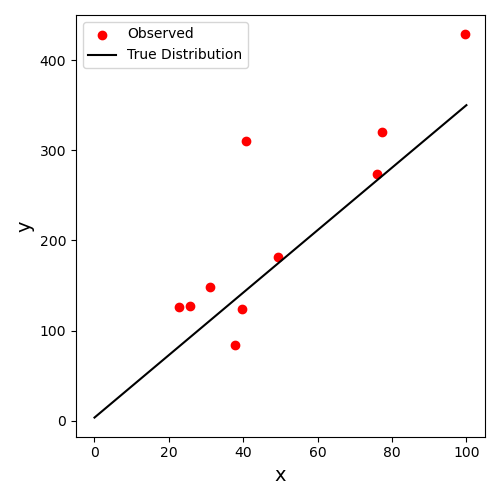

In [21]:
# Plotting the simulated observed vs. true distribution

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_obs, y_obs, color="red", label="Observed")
ax.plot([0,100], [m*0+b, m*100+b], color="black", label="True Distribution")
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
plt.legend()
fig.tight_layout()

Now we will build a model using `LinearRegression` in `sklearn.linear_model`. 

In [22]:
from sklearn.linear_model import LinearRegression

# Building a linear regression model, which we will call test_model
test_model = LinearRegression()

Rather than training the model, we will use `.fit()` to find the best-fit distribution from which the data was drawn. In this case, `X` will be the x values (instead of features), and `y` will be the observed y values (instead of labels). Once the model is created, the best-fit `m` and `b` values will be stored within the model under the keys `.coef_` and `.intercept_`, respectively. 

Remember, `.fit()` requires `X` to be a 2D array where each row is a separate measurement, so we will need to convert it from its current 1D shape. 

In [23]:
X = x_obs.reshape(-1,1)
print("Before:\n",x_obs)
print("After:\n", X)

Before:
 [49.46016455 22.80831044 25.54739238 39.63299097 37.73150977 99.65742302
 40.81972003 77.18939948 76.0536688  31.00093487]
After:
 [[49.46016455]
 [22.80831044]
 [25.54739238]
 [39.63299097]
 [37.73150977]
 [99.65742302]
 [40.81972003]
 [77.18939948]
 [76.0536688 ]
 [31.00093487]]


In [24]:
# Fitting the model
test_model.fit(X, y_obs)

LinearRegression()

In [25]:
# Pulling the best-fit m and b values from test_model
m_fit = test_model.coef_
b_fit = test_model.intercept_

# Constructing the best-fit line
y_fit = m_fit*np.arange(0,101,1) + b_fit

<IPython.core.display.Javascript object>


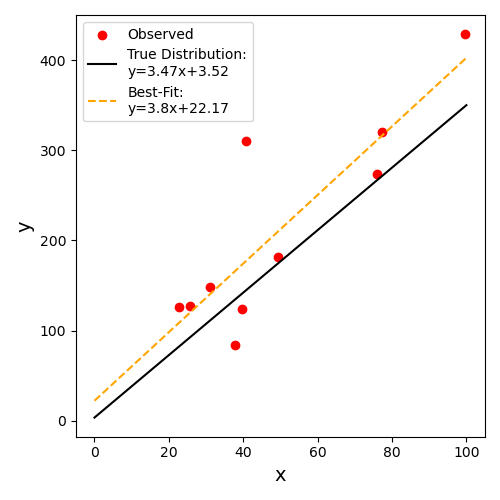

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_obs, y_obs, color="red", label="Observed")
ax.plot([0,100], [m*0+b, m*100+b], color="black", 
        label=f"True Distribution:\ny={round(m[0],2)}x+{round(b[0],2)}")
ax.plot(np.arange(0,101,1), y_fit, color="orange", 
        label=f"Best-Fit:\ny={round(m_fit[0],2)}x+{round(b_fit,2)}", 
        linestyle="--")
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
plt.legend()
fig.tight_layout()

How does this change if we give the algorithm more values? 

<IPython.core.display.Javascript object>


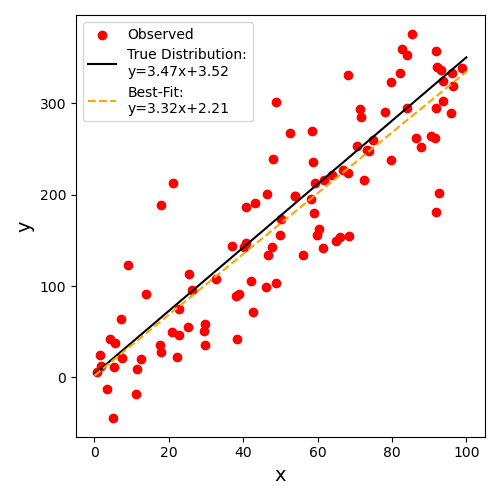

In [27]:
# Running again with 10x more values!
n_obs = 100

# Simulating n_obs random x values between 0 and 100
x_obs = np.random.uniform(0,100,n_obs)

# The true distribution is y = mx + b. 
# The observed distribution has some Gaussian noise (randomly simulated below)
y_true = m*x_obs + b

noise = np.random.normal(0,50,n_obs) # simulating random Gaussian noise with sigma=50
y_obs = y_true + noise

# Building 2D array from 1D array
X = x_obs.reshape(-1,1)

# Fitting the model
test_model2 = LinearRegression()
test_model2.fit(X, y_obs)

m_fit = test_model2.coef_
b_fit = test_model2.intercept_

y_fit = m_fit*np.arange(0,101,1) + b_fit

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_obs, y_obs, color="red", label="Observed")
ax.plot([0,100], [m*0+b, m*100+b], color="black", 
        label=f"True Distribution:\ny={round(m[0],2)}x+{round(b[0],2)}")
ax.plot(np.arange(0,101,1), y_fit, color="orange", 
        label=f"Best-Fit:\ny={round(m_fit[0],2)}x+{round(b_fit,2)}", 
        linestyle="--")
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
plt.legend()
fig.tight_layout()

# Image Classification with `fastai` and `torchforms`

Especially useful for astronomy is the ability of AI to evaluate objects from images. This can be done using a Convolutional Neural Network (CNN) in the the `fastai` package. Incredibly, this package includes algorithms that can classify objects based *or even predict feature values* (e.g. star formation rate) based on information encoded within images alone, depending on the models used. In this example, I will be demonstrating simple image classification. 

The code for this section is adapted from [this notebook](https://colab.research.google.com/github/jwuphysics/AstroHackWeek2022/blob/main/day2_ml_tutorial/02-deep-learning.ipynb#scrollTo=gzG6d5DhMEy5) by [John F. Wu](https://jwuphysics.github.io/resources/). The data are downloaded from the [Galaxy10 DECaLS dataset](https://astronn.readthedocs.io/en/latest/galaxy10.html), which was compiled from Galaxy Zoo. The labels are collated from volunteers (citizen scientists) tasked with classifying galaxies by-eye from randomly provided images from the SDSS DECaLS campaign. An example of sources under each label in the dataset is provided below:

![Example of galaxy classes from the DECals dataset.](https://astronn.readthedocs.io/en/latest/_images/galaxy10_example.png)

This dataset contains 17,736 galaxies, which takes a long time to read in and evaluate. In the interest of time, I pre-compiled a list of 2000 randomly-drawn galaxies from the DECaLS galaxy file and saved their images to a directory called `galaxies`. I also created a pandas DataFrame that tracks the the index of each galaxy as drawn from the `.h5` file, its label, and the corresponding classification. This DataFrame is saved as a `.csv` file in the `galaxies` directory called `galaxy_classifications.csv`. Below is the code I used to generate this list, in case you were interested in generating your own: 

In [28]:
# fastai is a high-level deep learning library built on Pytorch.
# If not already installed, install with the code below.
# Otherwise, comment out
# !pip install -q fastai --upgrade

import fastai
from fastai.vision.all import *
from fastai.vision.data import *

In [29]:
# Reading in the classifications DataFrame
gals = pd.read_csv("galaxies/galaxy_classifications.csv")
display(gals)

,Index,Label,Class
0,5,0,Disturbed
1,6,0,Disturbed
2,24,0,Disturbed
3,25,0,Disturbed
4,44,0,Disturbed
...,...,...,...
1995,17696,9,Edge-on with Bulge
1996,17705,9,Edge-on with Bulge
1997,17706,9,Edge-on with Bulge
1998,17707,9,Edge-on with Bulge


First, we need to set up a DataBlock, which will contain all of the information we will use to create our ML classification model. In the cell below, the defined DataBlock will pull information from our pandas DataFrame `gals`. 

The `blocks` parameter lets the algorithm know what kind of data it should expect for the features and labels. In this case, out input features are images (`ImageBlock`), and our desired outputs are classification labels (`CategoryBlock`). If we wanted to use this model to predict a feature value, we would use `RegressionBlock` for the output/labels parameter instead.

We must also define where the code should get the X and y values (e.g. the features and labels), which is done through `get_x` and `get_y`. 

`get_x` pulls the name of the images of each galaxy, which are being used in place of the features. Here, I compile the filenames from the `gals`, where each file name is in the form of `galaxies_{index}.jpg`. 

For `get_y`, the labels are pulled from the `Class` header in the `gals` DataFrame. We could also pull from the `Label` column to use the numeric labels instead; the results of the model fitting would not change. 

`DataBlock` can also be set to split the data into training and test sets using the `splitter` parameter. Below, I use the `RandomSplitter` function to split the sets up randomly, where the value in `RandomSplitter` is the fractional size of the test/validation set. Again, I am using a 70-30% split. 

In [30]:
# ImageBlock and CategoryBlock are functions from fastai.vision.data
# ColReader and RandomSplitter are from fastai.data.transforms
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_x = ColReader(["Index"], 
                                    pref="galaxies/galaxy_", 
                                   suff=".jpg"),
                  get_y = ColReader(["Class"]), 
                  splitter=RandomSplitter(0.3))

# Loading the data with data loaders
# ImageDataLoaders is a function from fastai.vision.data
dataloaders = ImageDataLoaders.from_dblock(dblock, gals)

The data is loaded in using `ImageDataLoaders`, which takes the DataBlock and the DataFrame it was built with to create an object containing the loaded images/data. 

As always, it's important to inspect the data and get familiar with it. 

<IPython.core.display.Javascript object>


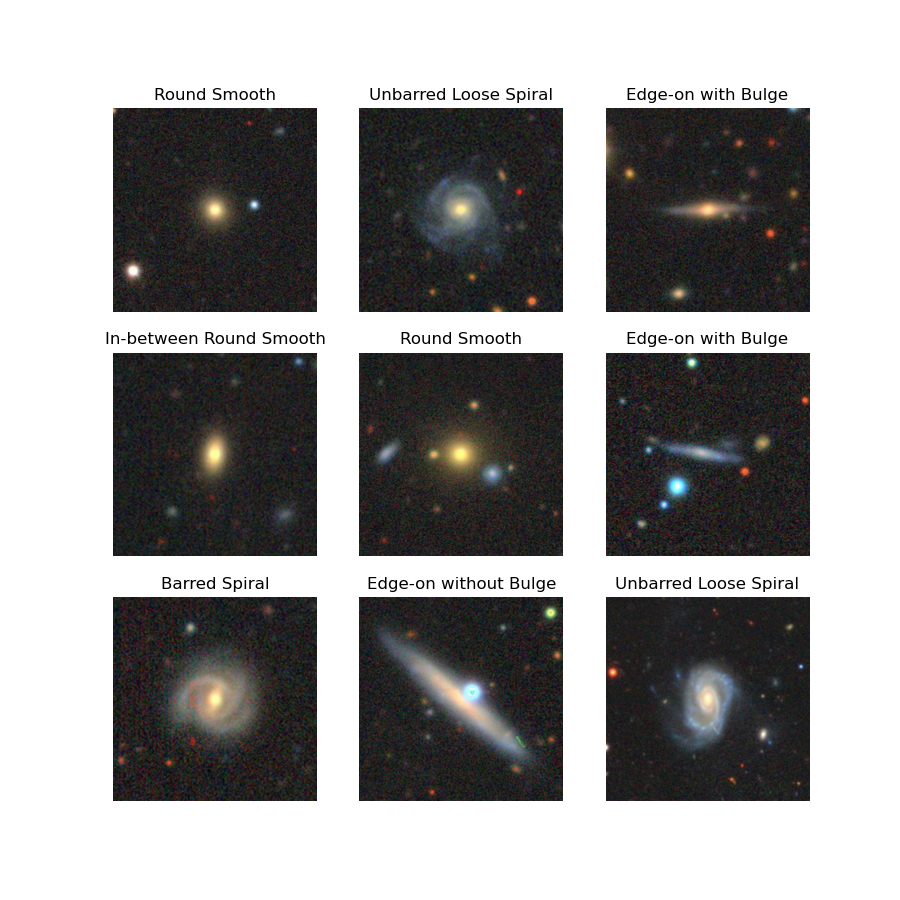

In [31]:
plt.rcParams.update({'font.size': 10})
# Showing an example of the galaxies loaded
dataloaders.show_batch(nrows=3, ncols=3)

<IPython.core.display.Javascript object>


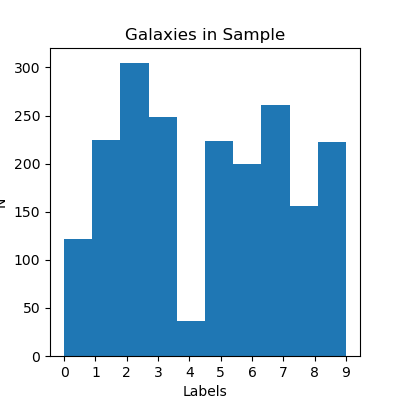

{0: 'Disturbed',
 1: 'Merging',
 2: 'Round Smooth',
 3: 'In-between Round Smooth',
 4: 'Cigar Shaped Smooth',
 5: 'Barred Spiral',
 6: 'Unbarred Tight Spiral',
 7: 'Unbarred Loose Spiral',
 8: 'Edge-on without Bulge',
 9: 'Edge-on with Bulge'}

In [32]:
# Plotting a histogram of the types of galaxies in the sample
plt.figure(figsize=(4,4))
plt.hist(gals["Label"])
plt.xticks(np.arange(0,10).tolist())
plt.xlabel("Labels")
plt.ylabel("N")
plt.title("Galaxies in Sample")
plt.show()

galclass = {
    0: 'Disturbed',
    1: 'Merging',
    2: 'Round Smooth',
    3: 'In-between Round Smooth',
    4: 'Cigar Shaped Smooth',
    5: 'Barred Spiral',
    6: 'Unbarred Tight Spiral',
    7: 'Unbarred Loose Spiral',
    8: 'Edge-on without Bulge',
    9: 'Edge-on with Bulge'}

# Printing the label key
display(galclass)

# QUESTION: How would you expect this sample to bias the model?

Now we're ready to create the model. The model we're using is called `vision_learner` (formerly known as `cnn_learner`), which is a convolutional neural network (CNN). CNNs basically run images through several different layers that alter the data with the intent of learning something about the data's features. 

<img src="https://www.mathworks.com/discovery/convolutional-neural-network/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_792810770_copy.adapt.full.medium.jpg/1745491656387.jpg" width="600"/> 

Image credit: [MathWorks](https://www.mathworks.com/discovery/convolutional-neural-network.html#)

Once the model is created, it's a good idea to try to optimize the learning rate, the step size used by the neural network as it learns from the training data. If the learning rate is set too low, then the CNN will progress very slowly, but set it too high and it will overshoot and result in poorly fit models.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*wfx8jLOyAmtsJpti1q_JMw.png"/>

Image credit: [Jeremy Jordan](https://www.jeremyjordan.me/nn-learning-rate/)

An optimal learning rate can be estimated with the `lr_find` function. This function plots the loss function -- representing how often the model misidentifies target values -- as a function of the learning rate. Generally, at some point the loss function sharply declines with increasing learning rate. The ideal learning rate is somewhere in this zone. 

<IPython.core.display.Javascript object>


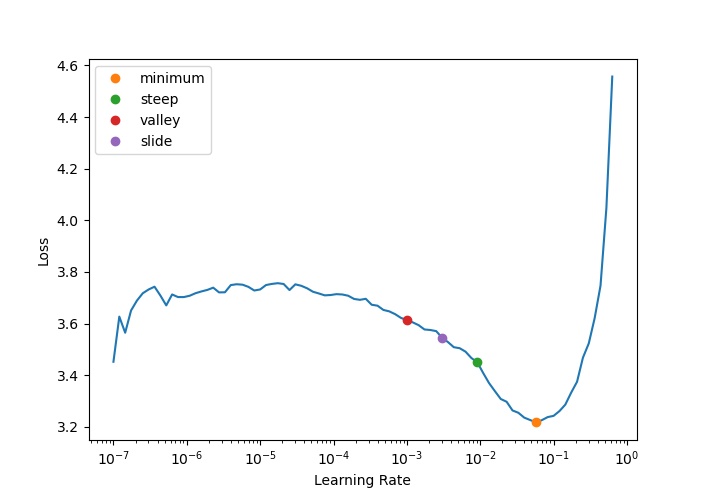

SuggestedLRs(minimum=0.005754399299621582, steep=0.009120108559727669, valley=0.0010000000474974513, slide=0.0030199517495930195)


In [33]:
# Creating the learner/model 

# a "learner" evaluates and updates the model 
# resnet18 and error_rate comes from fastai, as do the metrics below
vis_model = vision_learner(dataloaders, resnet18, metrics=error_rate)

# find an optimal learning rate
lrs = vis_model.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(lrs)

<IPython.core.display.Javascript object>


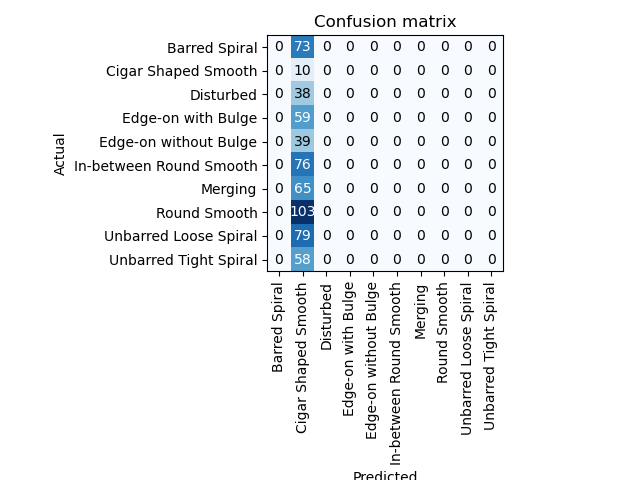

In [34]:
# Plotting the initial confusion matrix
plt.rcParams.update({'font.size': 10})
interp = ClassificationInterpretation.from_learner(vis_model)
interp.plot_confusion_matrix()

In [35]:
# Fitting and updating the model over a cycle of 2 epochs
vis_model.fit_one_cycle(2,lrs.steep)

epoch,train_loss,valid_loss,error_rate,time
0,3.255440,2.663258,0.745000,00:31
1,2.396370,1.794723,0.578333,00:31


<IPython.core.display.Javascript object>


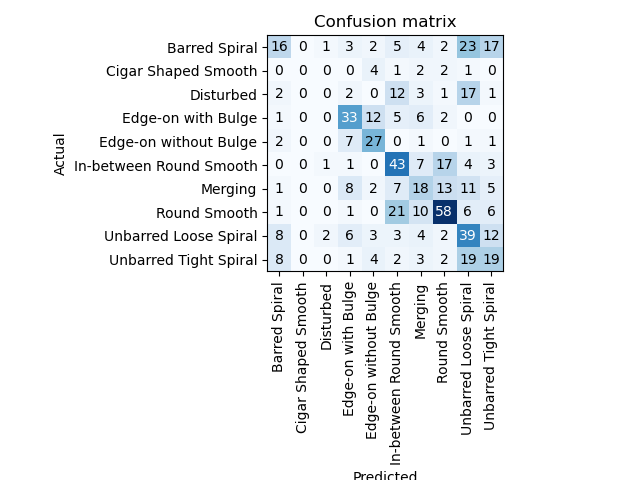

In [36]:
# Plotting the initial confusion matrix
interp = ClassificationInterpretation.from_learner(vis_model)
interp.plot_confusion_matrix()

The greater the number of epochs, the better the model (up to a certain point). 

In [37]:
# Fine-tuning the model through retraining over multiple epochs
vis_model.fine_tune(5, base_lr=lrs.steep)

epoch,train_loss,valid_loss,error_rate,time
0,1.679248,2.057369,0.571667,00:31


epoch,train_loss,valid_loss,error_rate,time
0,1.282772,1.870653,0.538333,00:44
1,1.016529,2.556247,0.520000,00:45
2,0.799361,2.124513,0.526667,00:45
3,0.528304,1.654546,0.440000,00:46
4,0.349728,1.615629,0.403333,00:45


<IPython.core.display.Javascript object>


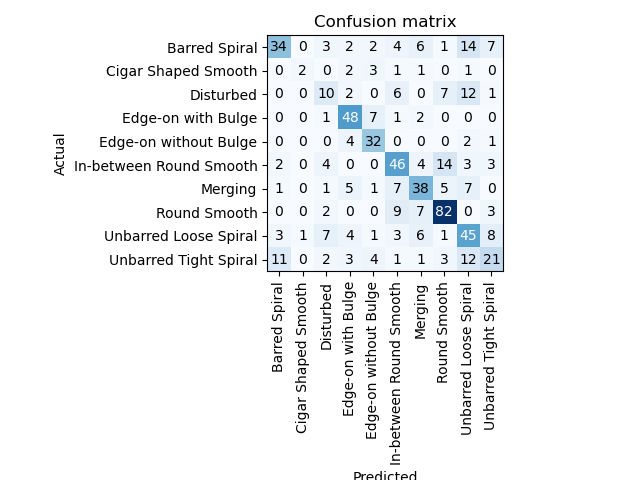

In [38]:
# New confusion matrix
interp = ClassificationInterpretation.from_learner(vis_model)
interp.plot_confusion_matrix()

<IPython.core.display.Javascript object>


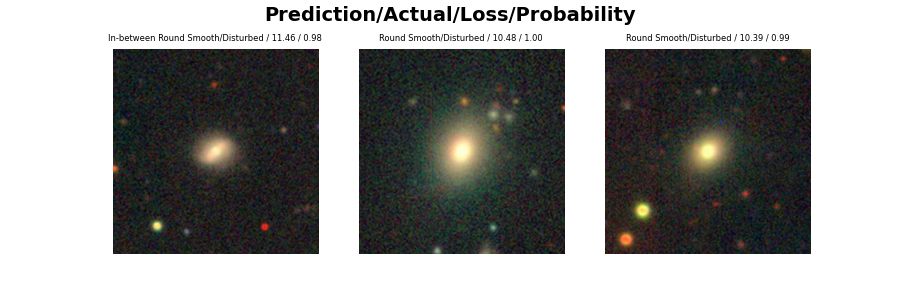

In [39]:
# Plotting the top losses (misclassifications)
plt.rcParams.update({'font.size': 5})
interp.plot_top_losses(3, nrows=1)

Once the model is in good condition, one can then start using it to classified unknown images: 
```vis_model.predict({image name})```

Try it on other galaxies in the `.h5` data file!